# Churn Prediction Modeling

## Overview
This notebook trains and evaluates **Logistic Regression**, **Decesion Tree**, and **Random Forest** models to predict customer churn. 

### **Steps in This Notebook**
1. Load the **preprocessed dataset** (`Model_Data.csv`).
2. Split the data into **training and testing sets**.
3. Train **Logistic Regression**, **Decesion Tree**, and **Random Forest** models.
4. Evaluate model performance using:
   - **Accuracy**
   - **Precision, Recall, and F1-score**
   - **Confusion Matrix**
5. Analyze **feature importance** to determine which factors contribute most to churn.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("Model_Data.csv")

Logistic Regression Accuracy: 0.8069552874378992
Decision Tree Accuracy: 0.794180269694819
Random Forest Accuracy: 0.7892122072391767
Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.83      0.90    

/var/folders/94/m84r7gw139ndfj_sklt8kxbc0000gn/T/ipykernel_6457/2072550619.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="coolwarm")


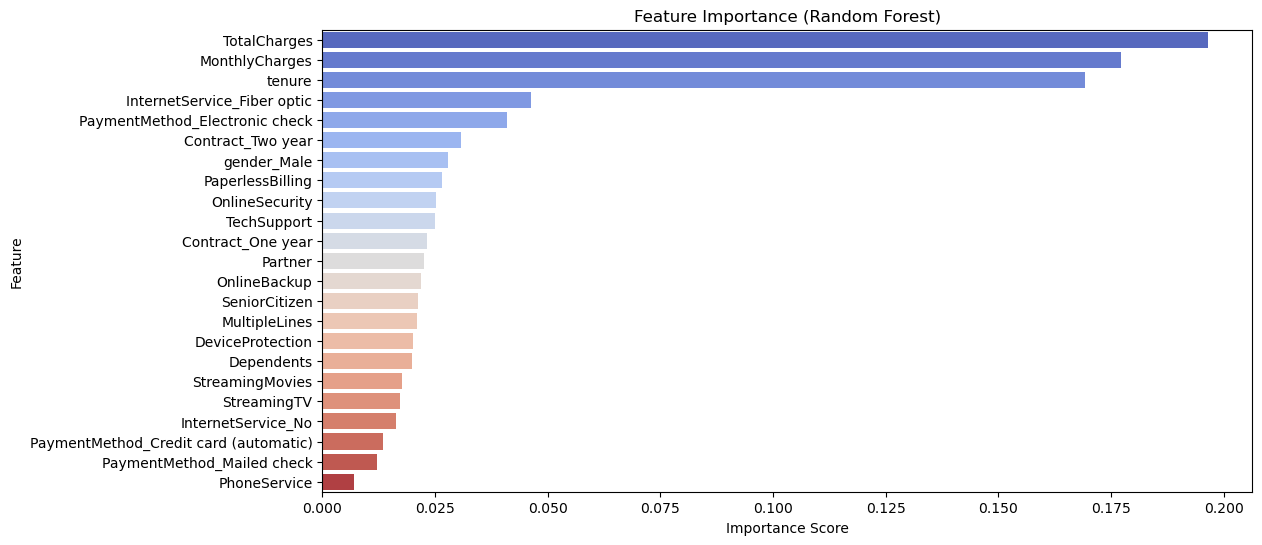

In [2]:
# Define Features (X) and Target (y)
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Split into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
log_model = LogisticRegression()
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

log_model.fit(X_train_scaled, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test_scaled)
y_pred_tree = tree_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Logistic Regression Accuracy:", accuracy_log)
print("Decision Tree Accuracy:", accuracy_tree)
print("Random Forest Accuracy:", accuracy_rf)

print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_log))

print("Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_tree))

print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="coolwarm")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig(os.path.join("Visuals", "Feature_Importance.png"))
plt.show()